SAVI (SOIL ADJUSTED VEGETATION INDEX FOR MANGROVE ANALYSIS)

               SAVI = [(1+L) * (NIR - RED)] / (NIR + RED + L)
        

SAVI adjusts for the effects of soil brightness on the vegetation indices, making it a useful tool for monitoring changes in mangrove vegetation cover and productivity over time. By using SAVI to estimate vegetation cover, researchers can identify areas that may be experiencing stress due to factors such as waterlogging, sedimentation, or pollution, and take appropriate actions to address them.


The SAVI threshold that is appropriate for mangrove extent determination can vary depending on the study area and the specific characteristics of the mangroves in that area. Generally, a threshold value of around 0.4 to 0.5 is commonly used for mangrove mapping using SAVI, but this can vary depending on factors such as the vegetation density, the spatial resolution of the imagery, and the atmospheric and topographic conditions. It is important to calibrate the threshold value based on ground truth data and to validate the results to ensure accuracy.

Threshold values you provided earlier (SAVI >= 0.5), any pixel with a SAVI value greater than or equal to 0.5 would be considered as a mangrove area.

The value of L for mangrove area depends on various factors, such as the location, the time of the year, and the vegetation index used. However, typically, an L value between 0.1 and 0.5 is used for mangrove areas.
    






In [1]:
%matplotlib inline

import datacube

import datacube
import odc.algo
import matplotlib.pyplot as plt
from datacube.utils.cog import write_cog

from deafrica_tools.plotting import display_map, rgb
dc = datacube.Datacube(app="04_Plotting")
#15.85828652, 80.78694696
#15.75418332, 81.02203692
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range = ('2022-01-15', '2023-02-15')
#display_map(x=lon_range, y=lat_range)
ds = dc.load(product="s2a_sen2cor_granule",
                 measurements=["B04_10m","B03_10m","B02_10m", "B08_10m","B11_20m"],
             x=lon_range,
             y=lat_range,
             time=time_range,
             output_crs='EPSG:6933',
             resolution=(-30, 30))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 2, y: 427, x: 757)
Coordinates:
  * time         (time) datetime64[ns] 2022-08-23T05:14:41.977841 2023-02-09T...
  * y            (y) float64 1.998e+06 1.998e+06 ... 1.985e+06 1.985e+06
  * x            (x) float64 7.795e+06 7.795e+06 ... 7.817e+06 7.818e+06
    spatial_ref  int32 6933
Data variables:
    B04_10m      (time, y, x) uint16 1609 1571 1573 1567 ... 1290 1267 1264 1252
    B03_10m      (time, y, x) uint16 2022 1978 1971 1972 ... 1612 1575 1578 1531
    B02_10m      (time, y, x) uint16 1468 1495 1473 1470 ... 1524 1468 1525 1489
    B08_10m      (time, y, x) uint16 4510 4596 4372 4512 ... 1136 1137 1138 1150
    B11_20m      (time, y, x) uint16 2530 2521 2499 2485 ... 1092 1092 1091 1089
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref


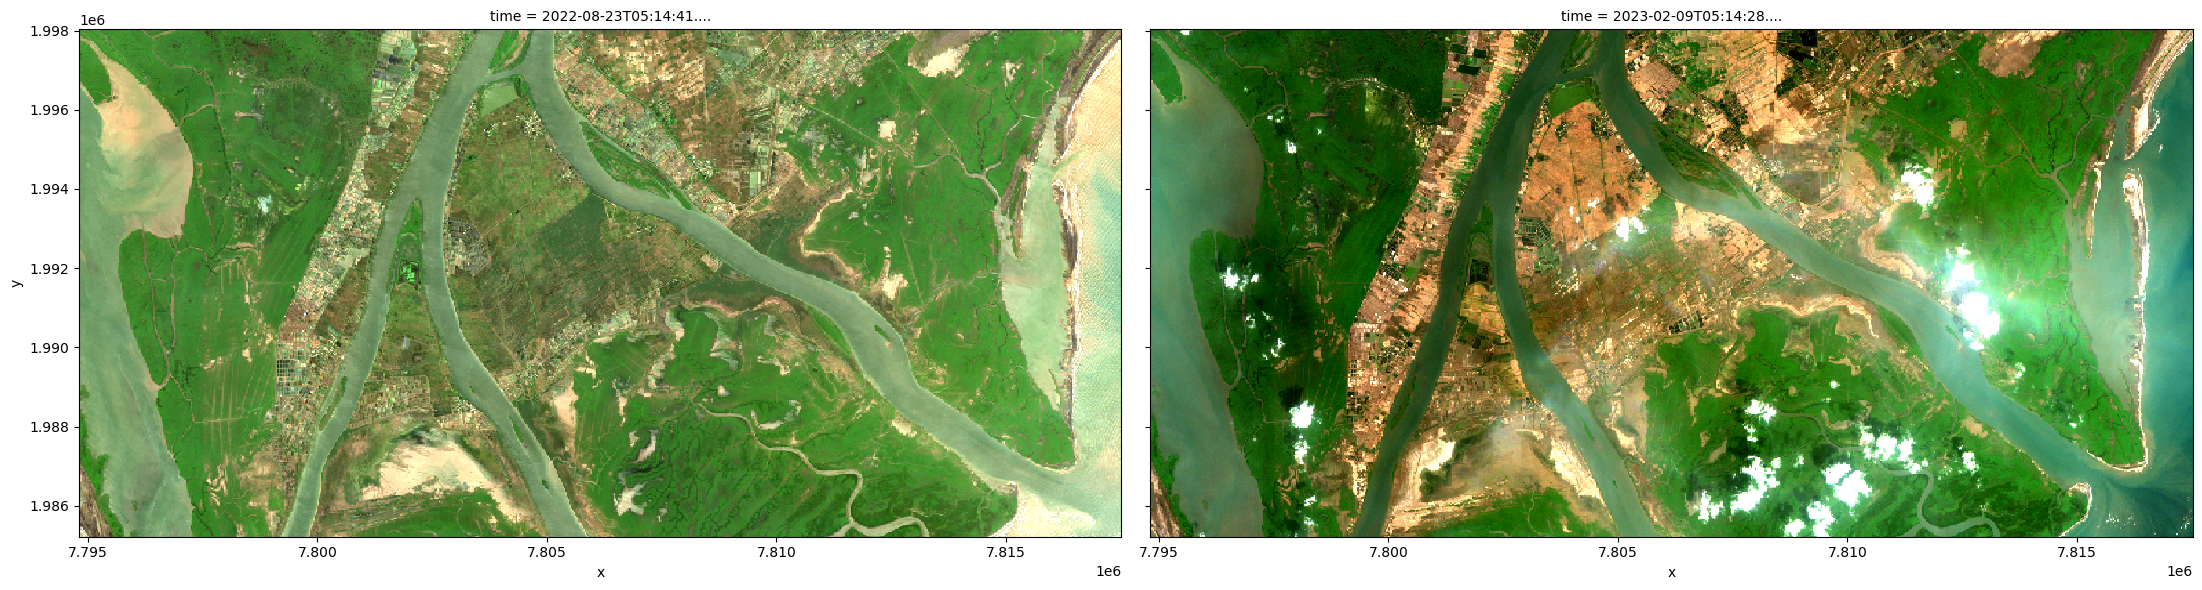

In [2]:
dataset = ds

rgb(ds, bands=['B04_10m', 'B03_10m', 'B02_10m'], index=[0, 1])

In [3]:
import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['#f55b31', 'cyan','red','#17d517','blue' '#169cf8'])
        .with_extremes(over='green', under='blue'))

bounds = [-1.0, 0.5,1.0]

In [4]:
# convert dataset to float32 datatype so no-data values are set to NaN
dataset =  odc.algo.to_f32(ds)
SAVI = ((dataset.B08_10m - dataset.B03_10m) * (1 + 0.5))/ (dataset.B08_10m + dataset.B03_10m + 0.5)
# Calculate the components that make up the NDVI calculation

print(SAVI)

<xarray.DataArray (time: 2, y: 427, x: 757)>
array([[[ 0.57129735,  0.5973078 ,  0.5677465 , ...,  0.17227994,
          0.16125984,  0.1317705 ],
        [ 0.5925757 ,  0.6001354 ,  0.6013425 , ...,  0.16142514,
          0.16018307,  0.07994533],
        [ 0.57544756,  0.55992705,  0.41303754, ...,  0.12785544,
          0.14937611,  0.05206701],
        ...,
        [-0.21757583, -0.18532671, -0.17476459, ..., -0.21823111,
         -0.2391329 , -0.22564445],
        [-0.18863496, -0.20289855, -0.19594502, ..., -0.21445782,
         -0.24035066, -0.21769352],
        [-0.17893723, -0.18647566, -0.17757848, ..., -0.22125216,
         -0.23050687, -0.24064538]],

       [[ 0.66254044,  0.6915246 ,  0.69221705, ...,  0.2670367 ,
          0.22502206,  0.23635755],
        [ 0.6916836 ,  0.6746811 ,  0.6898333 , ...,  0.21729043,
          0.23772849,  0.16098505],
        [ 0.6368701 ,  0.5628844 ,  0.49156964, ...,  0.18944661,
          0.2186081 ,  0.09468739],
        ...,
        [

<Figure size 800x800 with 0 Axes>

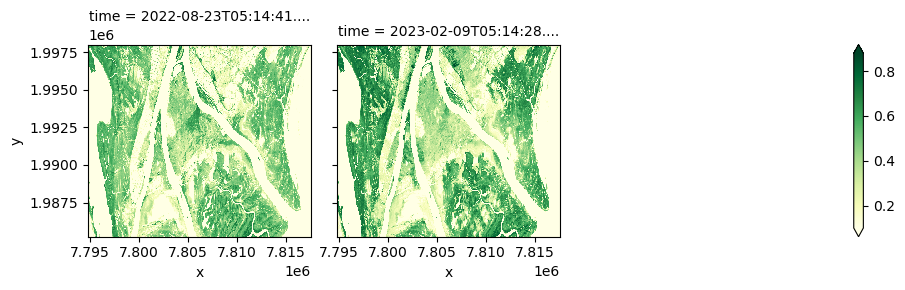

In [5]:
plt.figure(figsize=(8, 8))
SAVI.plot(col='time', cmap="YlGn", vmin=0.1, vmax=0.88, col_wrap=3)
plt.show() 

MANGROVE ANALYSIS USING SAVI as index

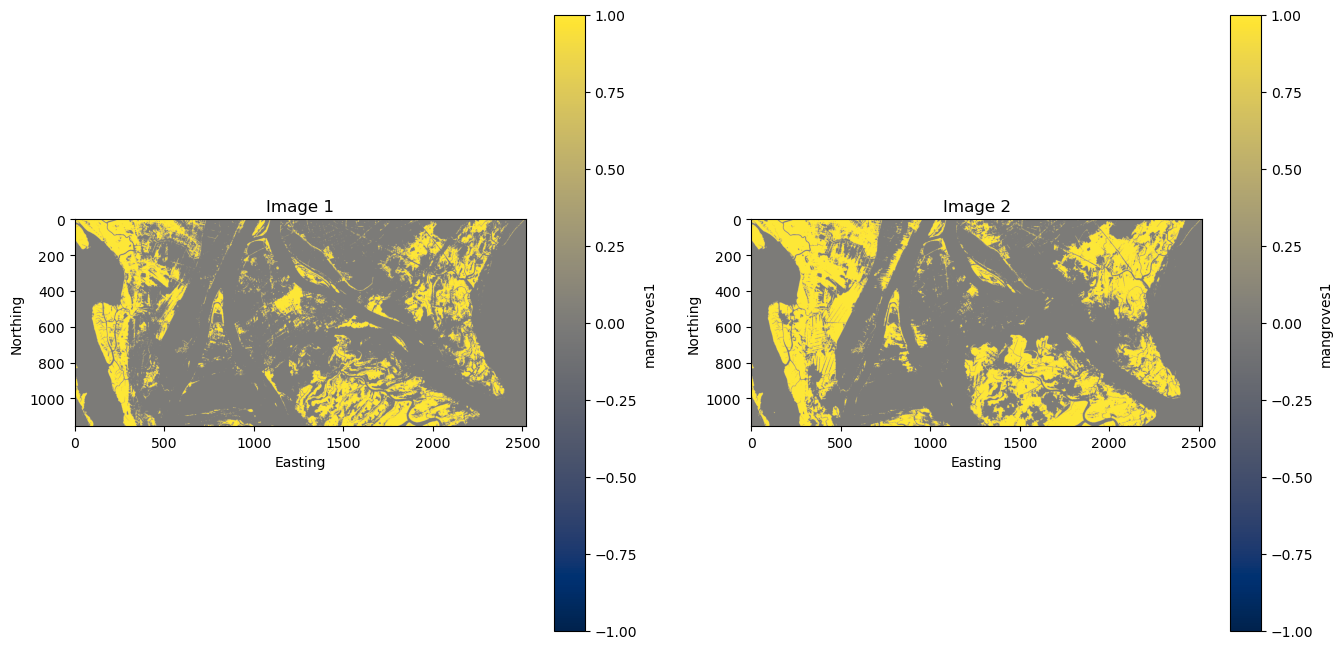

In [6]:
import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import odc.algo

# Connect to the datacube
dc = datacube.Datacube(app='savi_example')

# Define the query parameters
query = {
    'lat': (15.75418332, 15.85828652),
    'lon': (80.78694696, 81.02203692),
    'time': ('2022-01-15', '2023-02-15'),
    'measurements': ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B11_20m', 'B12_20m'],
    'product': 's2a_sen2cor_granule',
    'output_crs': 'EPSG:32644',
    'resolution': (-10, 10)
}

# Load the data
ds = dc.load(**query)

# Compute the NDVI
# convert dataset to float32 datatype so no-data values are set to NaN
#we can set L any value b/w 0.1 to 0.5 for mangrove area
dataset =  odc.algo.to_f32(ds)
SAVI = ((dataset.B08_10m - dataset.B03_10m) * (1 + 0.5))/ (dataset.B08_10m + dataset.B03_10m + 0.5)



mangroves1 = np.where(SAVI> 0.5, 1, 0)
# Create a colormap
cmap = plt.get_cmap('YlGn')

# Plot each image separately
fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
for i, ax in enumerate(axs.flat):
    im = ax.imshow(mangroves1[i], cmap='cividis', vmin=-1, vmax=1)
    ax.set_title('Image {}'.format(i+1))
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('mangroves1')

# Show the plot
plt.show()

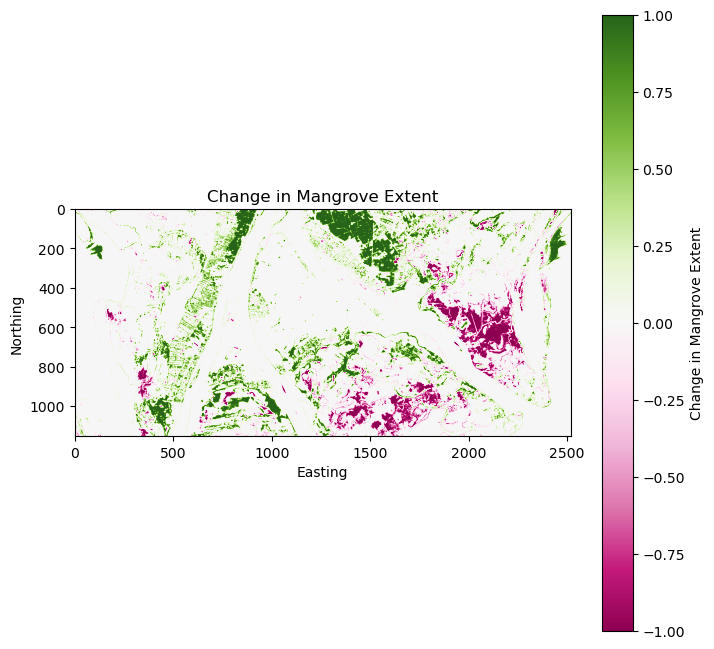

In [7]:
import datacube
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Connect to the datacube
dc = datacube.Datacube(app='mangrove_example')

# Define the query parameters
lat_range = (15.75418332, 15.85828652)
lon_range = (80.78694696, 81.02203692)
time_range1 = ('2022-01-15', '2022-12-15')
time_range2 = ('2023-01-15', '2023-02-15')

query = {
    'lat': lat_range,
    'lon': lon_range,
    'time': time_range1,
    'measurements': ['B04_10m', 'B03_10m', 'B02_10m', 'B08_10m', 'B11_20m', 'B12_20m'],
    'product': 's2a_sen2cor_granule',
    'output_crs': 'EPSG:32644',
    'resolution': (-10, 10)
}

# Load the data for the first time period
ds1 = dc.load(**query)


# Compute the MVI for the first time period
mangrove1 = ((ds1.B08_10m - ds1.B03_10m) / (ds1.B11_20m - ds1.B03_10m+0.5))*(1.5)
# Set threshold for mangrove detection
mangrove_thresh = 0.5

# Create a mangrove mask
mangrove_mask1 = np.where(mangrove1 > mangrove_thresh, 1, 0)

# Load the data for the second time period
query['time'] = time_range2
ds2 = dc.load(**query)

# Compute the MVI for the second time period
mangrove2 = ((ds2.B08_10m - ds2.B03_10m) / (ds2.B11_20m - ds2.B03_10m+0.5))*(1.5)
# Create a mangrove mask
mangrove_mask2 = np.where(mangrove2 > mangrove_thresh, 1, 0)

# Compute the change in mangrove extent
mangrove_change = mangrove_mask2 - mangrove_mask1

# Create a colormap
cmap = plt.get_cmap('PiYG')

# Plot the change in mangrove extent
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(mangrove_change[-1], cmap=cmap, vmin=-1, vmax=1)
ax.set_title('Change in Mangrove Extent')
ax.set_xlabel('Easting')
ax.set_ylabel('Northing')
cbar = fig.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Change in Mangrove Extent')

# Show the plot
plt.show()
